In [1]:
import pandas as pd
from prophet import Prophet 

Importing plotly failed. Interactive plots will not work.


In [2]:
df  = pd.read_csv("data/kor_gas_day.csv", encoding='euc-kr')

In [36]:
a_df.get_group('date')

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [31]:
a_df = df.loc[df.type == 'A']
a_df.loc[:, 'date'] = a_df.loc[:, ['year', 'month']].apply(lambda x: f'{x[0]}-{x[1]}', axis=1)
a_df = a_df.groupby(['date'], group_keys=False).mean()

a_df = a_df.loc[:, ['date', 'supply']]
a_df.columns = ['ds', 'y']

C:\Users\qja19\AppData\Local\Temp\ipykernel_5880\1893220405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:, 'date'] = a_df.loc[:, ['year', 'month']].apply(lambda x: f'{x[0]}-{x[1]}', axis=1)
C:\Users\qja19\AppData\Local\Temp\ipykernel_5880\1893220405.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a_df = a_df.groupby(['date'], group_keys=False).mean()


KeyError: "['date'] not in index"

In [5]:
m = Prophet()
m.fit(a_df)

14:47:11 - cmdstanpy - INFO - Chain [1] start processing
14:47:27 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = m.make_future_dataframe(periods=100)
forecast = m.predict(future)

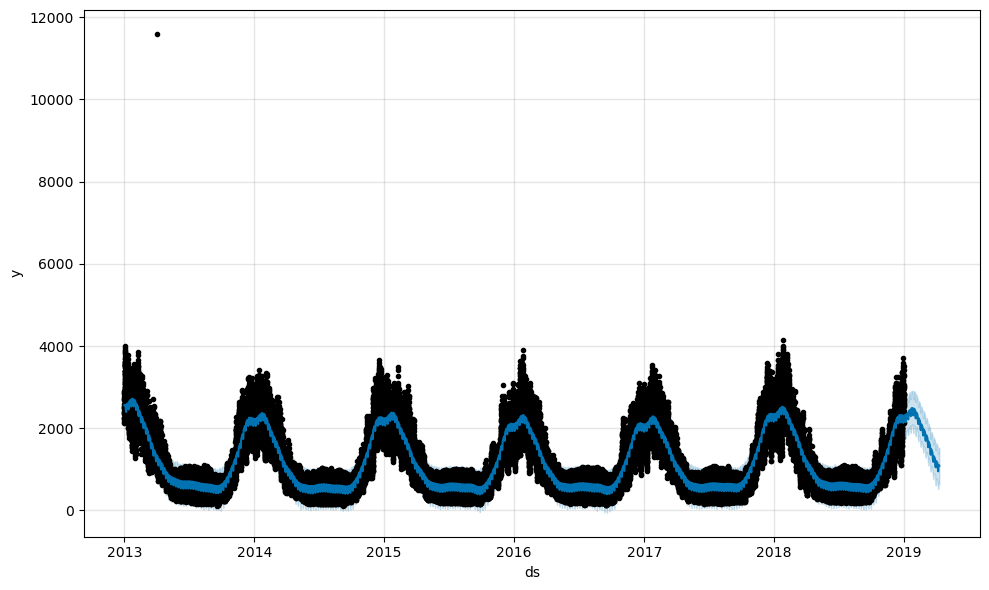

In [7]:
fig1 = m.plot(forecast)

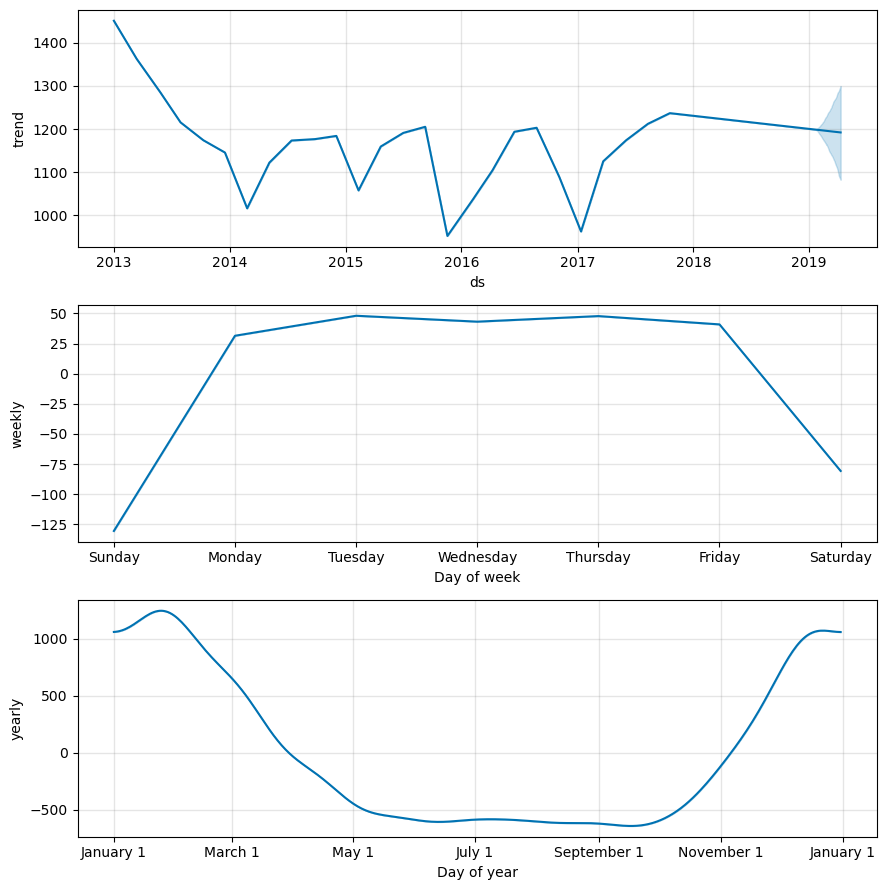

In [8]:
fig2 = m.plot_components(forecast)

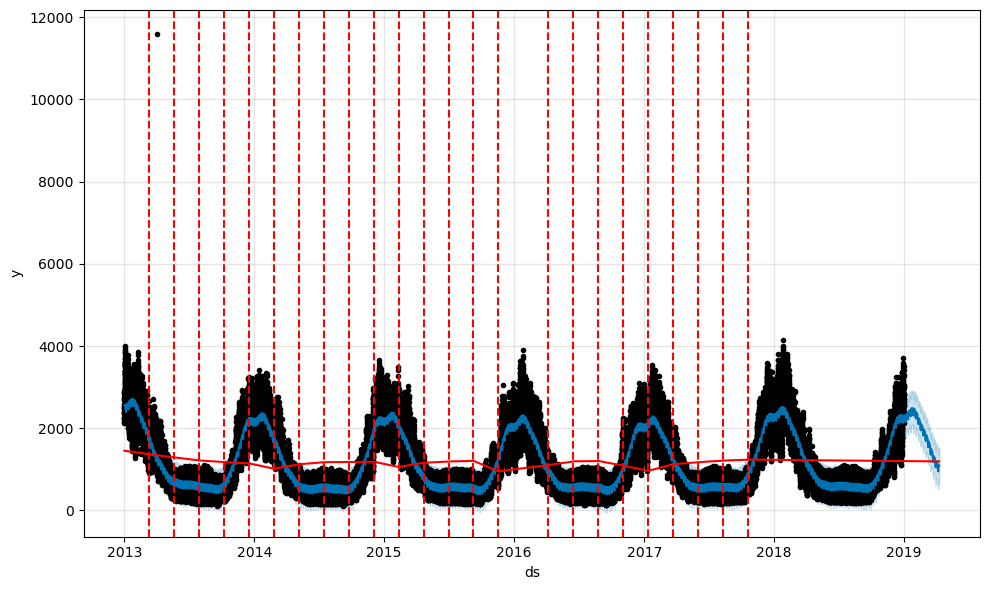

In [10]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

14:56:26 - cmdstanpy - INFO - Chain [1] start processing
14:56:45 - cmdstanpy - INFO - Chain [1] done processing


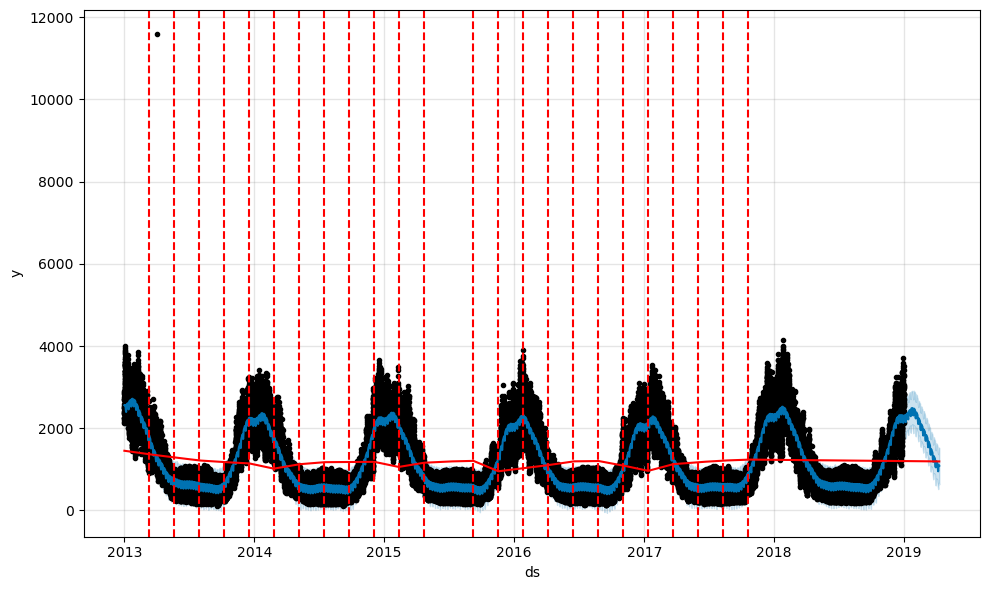

In [12]:
m = Prophet(changepoint_prior_scale=0.3)
m.fit(a_df)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

14:57:58 - cmdstanpy - INFO - Chain [1] start processing
14:58:29 - cmdstanpy - INFO - Chain [1] done processing


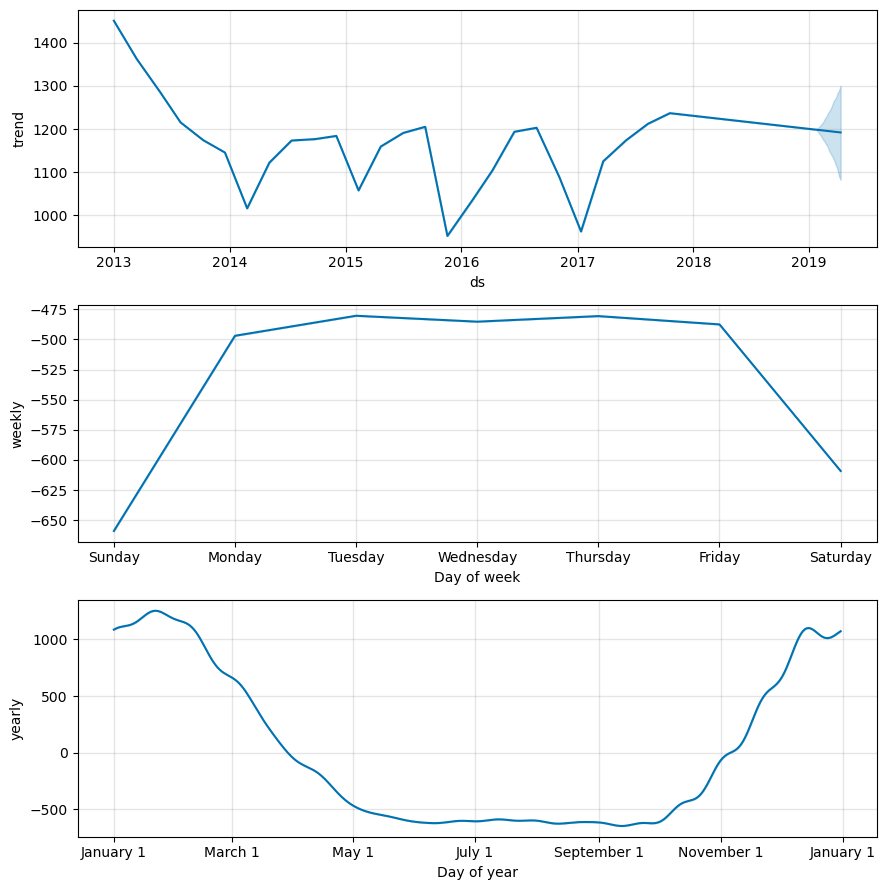

In [14]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)

m.fit(a_df)
fig = m.plot_components(forecast)

15:04:36 - cmdstanpy - INFO - Chain [1] start processing
15:04:56 - cmdstanpy - INFO - Chain [1] done processing


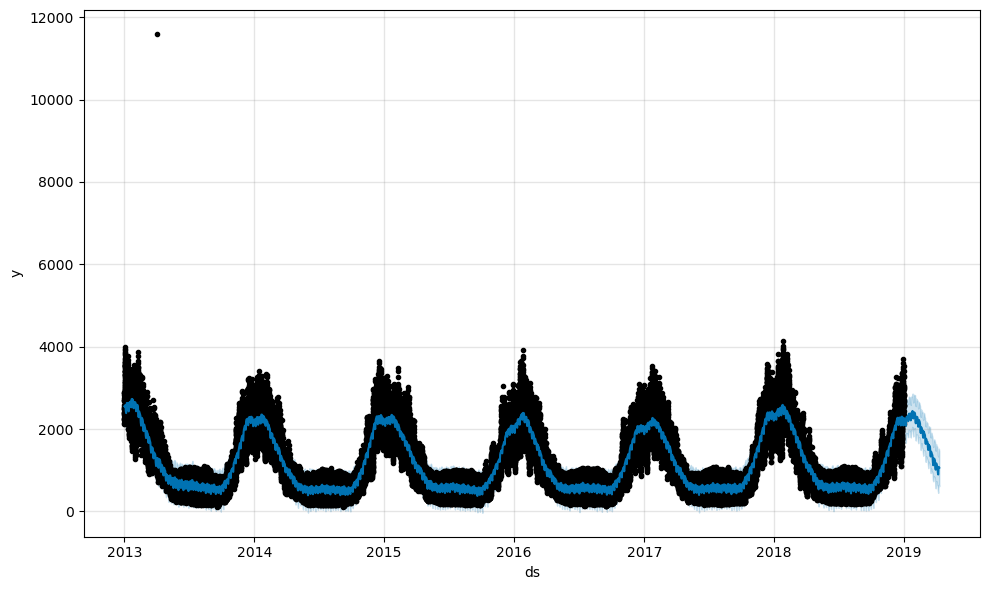

In [17]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

# Specifying Custom Seasonalities
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(a_df)
forecast = m.predict(future)
fig1 = m.plot(forecast)